In [1]:
#1. Zaczynamy od importowania bibliotek, których będziemy używać
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#2. Praca z danymi, które będziemy modelować
df = pd.read_csv('housing.data.txt', header=None,sep='\s+')

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


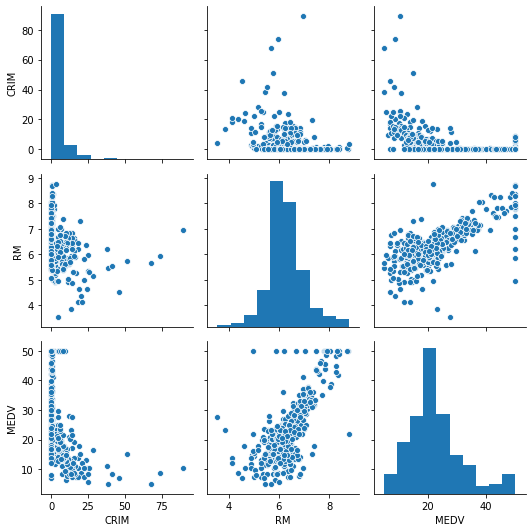

In [5]:
#3. Analiza danych

#https://seaborn.pydata.org/generated/seaborn.pairplot.html

cols = ['CRIM', 'RM', 'MEDV']

sns.pairplot(df[cols], hue=None, 
             hue_order=None, 
             palette=None, 
             vars=None, 
             x_vars=None, 
             y_vars=None, 
             kind='scatter', 
             diag_kind='auto', 
             markers=None, 
             height=2.5, aspect=1, 
            dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
plt.tight_layout()
plt.show()

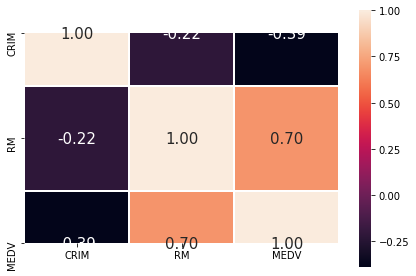

In [8]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(cm, vmin=None,
                 vmax=None, cmap=None,
                 center=None, robust=None,
                 annot=True, fmt='.2f',
                 annot_kws={'size': 15}, linewidths=1,
                 linecolor='white', cbar=True,
                 cbar_kws=None, cbar_ax=None,
                 square=True, xticklabels=cols, yticklabels=cols,
                 mask=None, ax=None)

# plt.savefig('wykresy/10_04.png', dpi=300)
plt.tight_layout()
plt.show()

In [5]:
#4. Regresja Liniowa napisana od zera

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        #eta współczynnik uczenia wykorzystywany do aktualizacji wag
        self.eta = eta
        #ile razy chcemy aktualizować wagi
        self.n_iter = n_iter

    def fit(self, X, y):
        #deklarujemy wagi dla kazdej zmiennej objaśniającej X (cechy) i wyrazu wolnego
        self.w_ = np.zeros(1 + X.shape[1])
        #lista do ktorej bedziemy dodawac błąd prognozy po kazdej iteracji
        self.cost_ = []
        
        #poczatek trenowania modelu (liczba iteracji)
        for i in range(self.n_iter):
            #wywolujemy funkcje net_input w celu obliczenia wektora prognoz
            output = self.net_input(X)
            #liczymy wektor błędów prognozy (wartosc rzeczywista - prognozowana)
            errors = (y - output)
            #aktualizujemy wagi (zwiekszamy lub pomniejszamy) eta (wsp. uczenia) * macierz transponowana X * wektor błędów 
            self.w_[1:] += self.eta * X.T.dot(errors)
            #aktualizujemy wage0
            self.w_[0] += self.eta * errors.sum()
            #liczymy błąd epoki i dodajemy do listy z błędami
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    #funkcja zwraca wektor sum (prognozy) zmiennych objaśniających X przez swoje wagi
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    #funkcja prognozujaca
    def predict(self, X):
        return self.net_input(X)

In [6]:
X = df[['RM']].values
y = df['MEDV'].values

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [8]:
lr = LinearRegressionGD(eta=0.001, n_iter=20)
lr.fit(X_std, y_std)

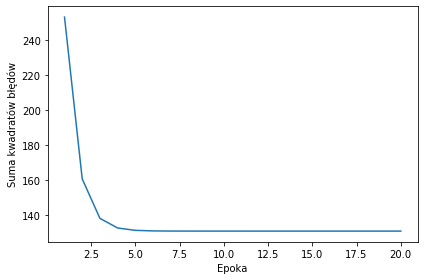

In [13]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('Suma kwadratów błędów')
plt.xlabel('Epoka')
plt.tight_layout()
plt.show()

In [10]:
wagi = ['%.3f' % x for x in lr.w_]
wagi

['-0.000', '0.695']

In [14]:
#5 Gotowa regresja liniowa z biblioteki Skilearn

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

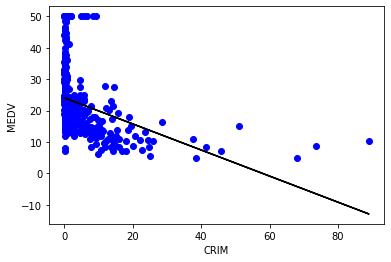

In [17]:
#https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.scatter.html

plt.scatter(X, y, s=None, c="blue",
            marker=None, cmap=None, 
            norm=None, vmin=None, 
            vmax=None, alpha=None,
            linewidths=None, verts=None,
            edgecolors=None, plotnonfinite=False,
            data=None)

plt.plot(X, slr.predict(X), color = "black")
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()